In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import *
import numpy as np

2024-04-16 12:58:38.605991: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-16 12:58:38.606054: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-16 12:58:38.607709: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Read the Dataset

In [2]:
# read train ad test data folder
train_path = '/kaggle/input/covid19-image-dataset/Covid19-dataset/train'
test_path = '/kaggle/input/covid19-image-dataset/Covid19-dataset/test'

In [3]:
# Image classes
image_lasses = os.listdir('/kaggle/input/covid19-image-dataset/Covid19-dataset/train')

In [4]:
image_lasses

['Normal', 'Viral Pneumonia', 'Covid']

# Data Visualization

In [5]:
image_classes = ['Normal', 'Viral Pneumonia', 'Covid']

def plot_image(image_classes):
    plt.figure(figsize = (12,12))
    
    for i, category in enumerate(image_classes):
        image_path = train_path + '/' + category
        images_in_folder = os.listdir(image_path)
        
        first_image = images_in_folder[0]
        first_image_path = image_path + '/' + first_image
        
        img = image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255
        
        plt.subplot(1,3, i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
        
    plt.show()

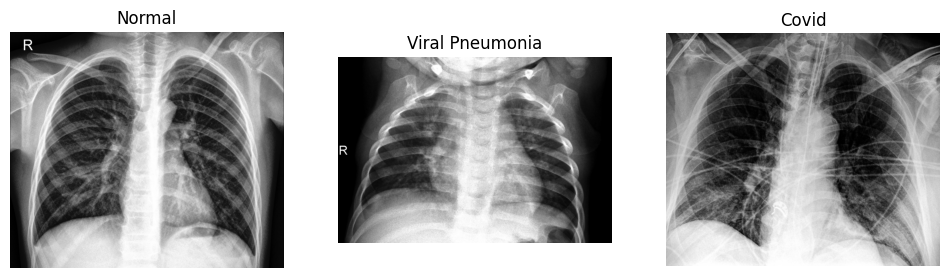

In [6]:
plot_image(image_classes)

# Image Processing

In [7]:
data_generator = ImageDataGenerator(rescale = 1/255)

In [8]:
#train Data
train_data = data_generator.flow_from_directory(train_path,
                                               target_size = (224,224),
                                               batch_size = 16)


Found 251 images belonging to 3 classes.


In [9]:
#test Data
test_data= data_generator.flow_from_directory(test_path,
                                             target_size =(224,224),
                                             batch_size = 1)

Found 66 images belonging to 3 classes.


# Model Building

In [10]:
#model building
cnn_model = Sequential()

#add conv layer with filter, kernal_size , activation and input shape
cnn_model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                    activation = 'relu', input_shape = [224,224,3]))

# add maxpooling layer
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

#add conv layer with filter, kernal_size , activation and input shape
cnn_model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                    activation = 'relu'))

# add maxpooling layer
cnn_model.add(MaxPooling2D())

#add conv layer with filter, kernal_size , activation and input shape
cnn_model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                    activation = 'relu'))

# add maxpooling layer
cnn_model.add(MaxPooling2D())

#add flatten layer
cnn_model.add(Flatten())

#fully_connected layers 
cnn_model.add(Dense(128,activation = 'relu'))
cnn_model.add(Dense(128,activation = 'relu'))

#output layer
cnn_model.add(Dense(3, activation = 'softmax'))




/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


# Compile & Fit Model

In [11]:
# compile model
cnn_model.compile(optimizer ='adam',
                 loss = 'categorical_crossentropy',
                 metrics =['accuracy'])

In [12]:
# fit model 
model_history = cnn_model.fit(train_data, 
                             epochs = 5,
                             validation_data = test_data)

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/16 ━━━━━━━━━━━━━━━━━━━━ 2:36 10s/step - accuracy: 0.5000 - loss: 1.0836

I0000 00:00:1713272343.534171     313 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1713272343.551886     313 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 588ms/step - accuracy: 0.5230 - loss: 1.3810 - val_accuracy: 0.6818 - val_loss: 0.8434
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 242ms/step - accuracy: 0.8334 - loss: 0.4266 - val_accuracy: 0.8485 - val_loss: 0.5183
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 270ms/step - accuracy: 0.9306 - loss: 0.2178 - val_accuracy: 0.8030 - val_loss: 0.4700
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 260ms/step - accuracy: 0.9439 - loss: 0.1207 - val_accuracy: 0.8333 - val_loss: 0.4127
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 253ms/step - accuracy: 0.9832 - loss: 0.0770 - val_accuracy: 0.8788 - val_loss: 0.3853


## **Model Performance visualization**

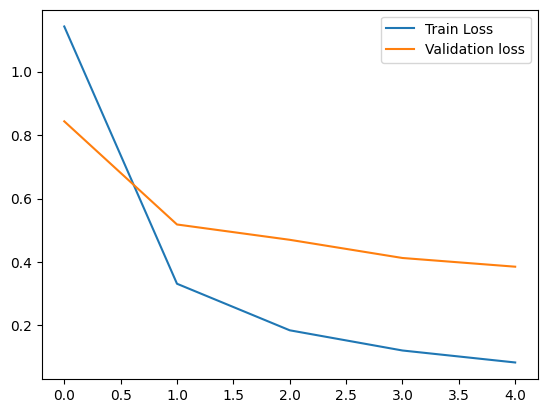

In [13]:
plt.plot(model_history.history['loss'], label= 'Train Loss')
plt.plot(model_history.history['val_loss'], label = 'Validation loss')
plt.legend()
plt.show()

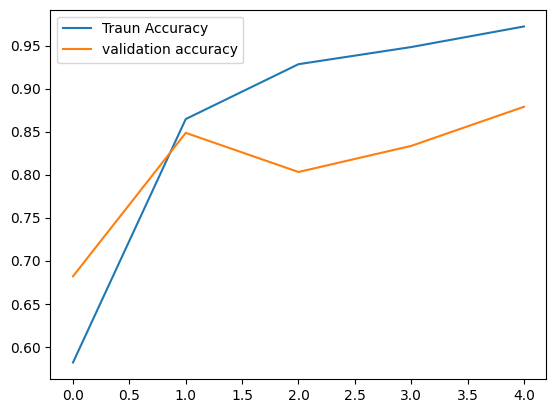

In [14]:
plt.plot(model_history.history['accuracy'],label = 'Traun Accuracy')
plt.plot(model_history.history['val_accuracy'],label = 'validation accuracy')
plt.legend()
plt.show()

# Model Evaluation

In [15]:
cnn_model.evaluate(test_data)

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8888 - loss: 0.3708


[0.38527220487594604, 0.8787878751754761]

In [16]:
cnn_model.evaluate(train_data)

 1/16 ━━━━━━━━━━━━━━━━━━━━ 13s 891ms/step - accuracy: 1.0000 - loss: 0.0049

W0000 00:00:1713272398.421794     312 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 341ms/step - accuracy: 0.9865 - loss: 0.0240


[0.024959806352853775, 0.9880478382110596]

# Predict New Image

In [21]:
testing_image = '/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Covid/0119.jpeg'

In [22]:
class_map = dict([value, key] for key , value in train_data.class_indices.items())
class_map

{0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}

In [23]:
def prediction(testing_image, actual_label):
    
    #load & preprocessing image
    test_img = image.load_img(testing_image, target_size = (224,224))
    test_img_arr = image.img_to_array(test_img) /255
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0],
                                          test_img_arr.shape[1],
                                          test_img_arr.shape[2]))
    
    #make prediction
    predicted_class = np.argmax(cnn_model.predict(test_img_input))
    predicted_img = class_map[predicted_class]
    
    plt.figure(figsize = (4,4))
    plt.imshow(test_img_arr)
    plt.title("Actual Label : {}, Predicted Label : {}".format(actual_label,
                                                              predicted_img))
    plt.grid()
    plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


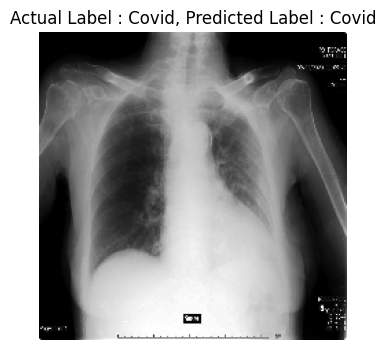

In [24]:
prediction(testing_image, actual_label = 'Covid')

# Save Model

In [25]:
cnn_model.save("covid_19_model.h5")